# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import math
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.weightstats as wst


In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Anu\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


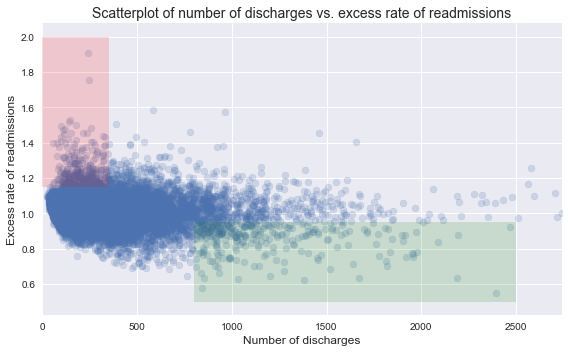

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### A. Do you agree with the above analysis and recommendations? Why or why not?

It is difficult to agree with the above analysis just based on the trend seen in a scatter plot without any statistical tests. The difference in mean excess readmission rate is just 1.023 - 0.978, ie 0.045. Unless we do an appropriate hypothesis test, we cannot reach a conclusion that hospitals with smaller capacity tend to have more excess readmission rate and need to be overhauled.

#### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

    1. Setup an appropriate hypothesis test.   
    2. Compute and report the observed significance value (or p-value).   
    3. Report statistical significance for $\alpha$ = .01. 

##### Some Data cleanup and dataset info

In [6]:
df = clean_hospital_read_df.rename(columns = { 'Number of Discharges': 'discharges', 'Excess Readmission Ratio': 'excess_readmission_ratio'})
len(df)

11578

In [7]:
df.describe()

,Provider Number,discharges,Footnote,excess_readmission_ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [8]:
# Remove rows with NANs in excess_readmission ratio
df = df[pd.notnull(df.excess_readmission_ratio)]
len(df)

11497

In [9]:
#Dividing the dataset into small hospital and large hospital group
small_hosp = df[df.discharges <= 300]
len(small_hosp)

6132

In [10]:
large_hosp = df[df.discharges > 300]
len(large_hosp)
#np.median(df.discharges)

5365

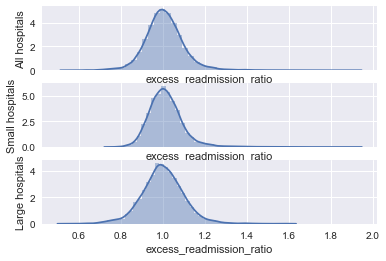

In [11]:
# Let's see how the excess readmission rate is distributed in the sample and the two groups
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex= True)
sns.distplot( df.excess_readmission_ratio, ax = ax1)
ax1.set(ylabel = 'All hospitals')
sns.distplot( small_hosp.excess_readmission_ratio, ax = ax2)
ax2.set(ylabel = 'Small hospitals')
sns.distplot( large_hosp.excess_readmission_ratio, ax = ax3)
ax3.set(ylabel = 'Large hospitals')

The above plot shows a very minor tilt for the excess readmission ratio going less than 1.0 in the large hospital group. Let's see if this is statistically significant

**Hypothesis Test**

For the purposes of this study, let's consider hospitals having no. of discharges less than 300 as the 'small' hospital group and those having no. of discharges greater than 300 as the 'large' hospital group. The objective is to study whether the mean excess readmission rate is different across the two groups. The test statistic here is the mean excess readmission rate, m_ex.

    H0 -> m_ex_small - m_ex_large = 0
    Ha -> m_ex_small - m_ex_large > 0

In [21]:
# Doing a two-sample z test for the mean excess readmission rate
#st.ttest_ind(small_hosp.excess_readmission_ratio, large_hosp.excess_readmission_ratio)
wst.ztest(x1 = small_hosp.excess_readmission_ratio, x2 = large_hosp.excess_readmission_ratio, alternative='larger')


(8.4479918223645623, 1.4817806675520213e-17)

The p-value in the above two sample test is very low considering $\alpha$ = 0.01 and would suggest accepting the alternate hypothesis.
Verifying the p-value in another way as below

In [13]:
observed_diff = np.mean(small_hosp.excess_readmission_ratio) - np.mean(large_hosp.excess_readmission_ratio)
observed_diff

0.014479507404359437

In [22]:
var_small = np.var(small_hosp.excess_readmission_ratio ) / len(small_hosp)
var_large = np.var(large_hosp.excess_readmission_ratio) / len(large_hosp)
se = math.sqrt(var_small + var_large)
st.norm.interval(0.95, loc = 0, scale = se)


(-0.0034047351989548455, 0.0034047351989548455)

The 95% confidence interval for the difference in means is shown above. Clearly, the observed difference in mean falls out of this interval and we can conclude that the alternate hypothesis is true

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistically, we can see that the small hospitals tend to have a higher excess readmission ratio than the larger hospitals. 
Though the observed difference in the means is small value, 0.014, it has statistical significance in terms of p-value. It will be interesting to see the effect size here


In [15]:
# Computing effect size, Cohen's d -- Simplified, assuming a common standard deviation here TO BE DISCUSSED
effect_size = observed_diff / np.std(df.excess_readmission_ratio)

effect_size

0.15745395225924283

An effect size (Cohen's d) of 0.15 is considered to be 'Very Small' to 'Small' effect as per Wiki - https://en.wikipedia.org/wiki/Effect_size 

In a practical angle too, it definitely needs rethinking before taking up such a major overhaul only to improve the excess readmission rate by a small value. We'll definitely need to do a cost-benefit analysis.

In [16]:
#The whole sample
np.std(df.excess_readmission_ratio)

0.09196026645631224

In [17]:
#Small hospitals
np.std(small_hosp.excess_readmission_ratio)

0.0824190929921611

In [18]:
#Large hospitals
np.std(large_hosp.excess_readmission_ratio)

0.10122506337004333

#### 5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

The scatter plot helps to identify correlation between two variables, but that by itself is not sufficient to make any conclusions. For eg, a large majority of points in the scatter lie in an acceptable region where the excess readmission rate is close to 1 or even less than one. The points in the red area could be some outliers or may have other contributing factors as well, which may need more detailed analysis.

Another disadvantage is when too many points clutter some area, it may mask some info

Below is another view of the same information

In [19]:
freq = pd.DataFrame(df.groupby((df.discharges // 100 *100)+ 100).size())

freq = freq.rename(columns = {0: 'counts'})
freq.reset_index(inplace=True)
ratios = pd.DataFrame(df.groupby((df.discharges // 100 * 100)+100)['excess_readmission_ratio'].mean())
ratios.reset_index(inplace=True)
 

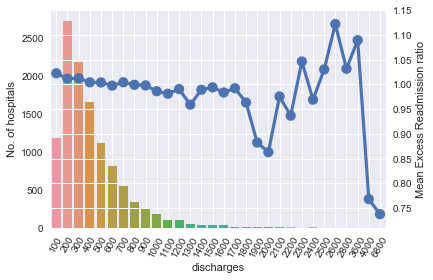

In [20]:
fig, ax1 = plt.subplots()
ax1= sns.barplot(freq.discharges, freq.counts)
ax1.set(ylabel = 'No. of hospitals')
ax1.set_xticklabels(list(freq.discharges), rotation=60)
ax1.set_xlim(0, 2000)
ax2 = ax1.twinx()
ax2 = sns.pointplot(ratios.discharges, ratios.excess_readmission_ratio)
ax2.set(ylabel = 'Mean Excess Readmission ratio')
sns.despine(ax=ax2, right=False, left=True)
sns.despine(ax=ax1, left=False, right=True)
ax1.grid(None)

The above visualization clearly shows how the excess readmission ratio swings above 1 for larger hospitals. And we can also see that a large majority of hospitals do not have high no. of discharges. So the practicality of the recommendations in the preliminary study is evidently questionable as seen in the above visualization.
